<a href="https://colab.research.google.com/github/amansaxna/BreastCancer/blob/main/Copy_of_wdbc_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Libraries

In [ ]:
#!pip install -U scikit-learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
#feature Scaling  
from sklearn.preprocessing import StandardScaler 
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.
random_state= 42

### 2. Reading Dataset and Validation

In [ ]:
df = pd.read_csv("data.csv", )
data = pd.read_csv("data.csv", )
df_original = df.copy(deep = 'true')
df.shape

(569, 33)

In [ ]:
#print(df[['diagnosis','area_mean','area_se','texture_mean','concavity_worst','concavity_mean']])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### 3. Data Analysis (EDA : Exploratory Data Analysis)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull().sum().sum()

569

#### As we can see above that unamed coulmn has 569 null values and we need to drop that 

##### Dropping Coulmn With NULL values

In [ ]:
drop_cols = ['Unnamed: 32']
df.drop(drop_cols,axis=1,inplace = True)

#### After Dropping 

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df["diagnosis"].value_counts()
print(df["diagnosis"].value_counts(normalize=True))

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


#### 3.1 DATA VISUALISATION

In [ ]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

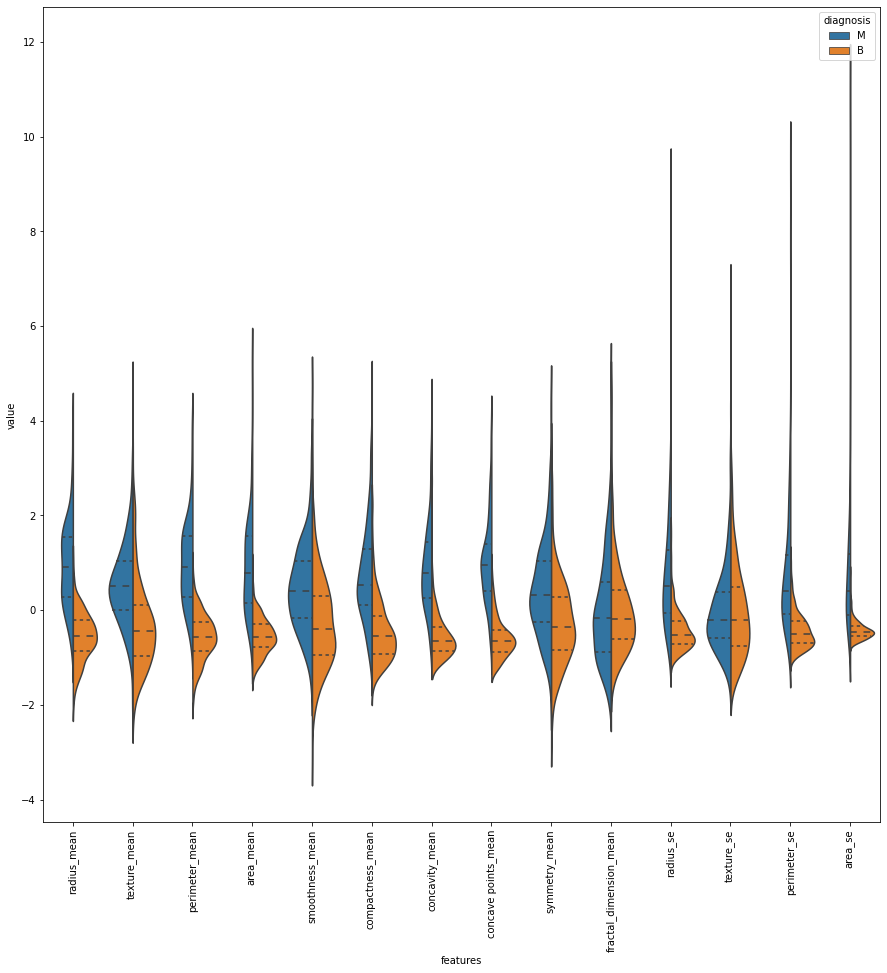

In [ ]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:14]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

##### In the above graph:  in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

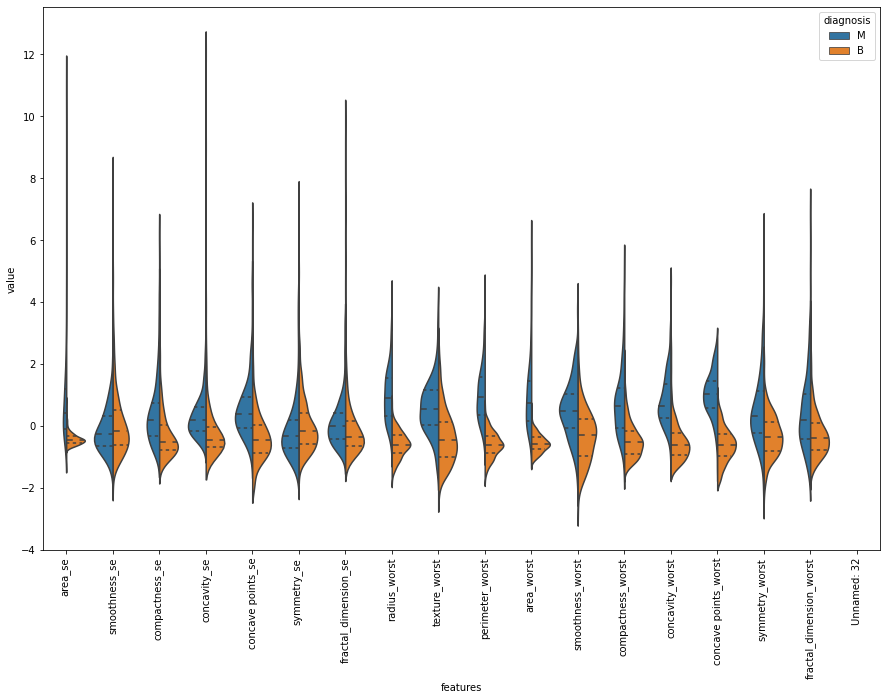

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,13:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name='features',
                    value_name="value")
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
#data = pd.concat([y,data_n_2.iloc[:,13]],axis=1)
#data = pd.melt(data,id_vars="diagnosis",
   #                 var_name="features",
    #                value_name='value')
#plt.figure(figsize=(5,5))
#sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
#plt.xticks(rotation=90)

In [ ]:
# third ten features
#data = pd.concat([y,data_n_2.iloc[:,12:13]],axis=1)
#data = pd.melt(data,id_vars="diagnosis",
#                    var_name="features",
#                    value_name='value')
#plt.figure(figsize=(10,10))
#sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
#plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

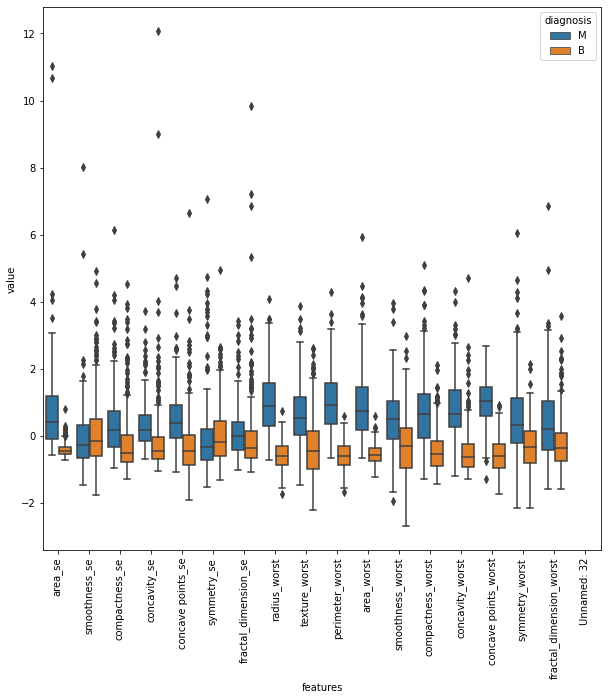

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

##### One thing that we notice about the above plot is that concavity_worst and concave point_worst looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)



##### In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

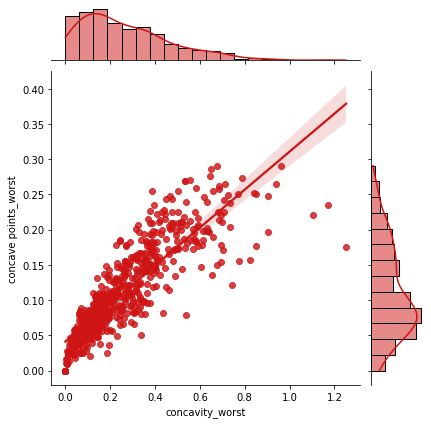

In [ ]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

#### What about three or more feauture comparision ? For this purpose we can use pair grid plot.We discovered one more thing from the pair grid plot i.e.radius_worst, perimeter_worst and area_worst are correlated. We definetely use these discoveries for feature selection.

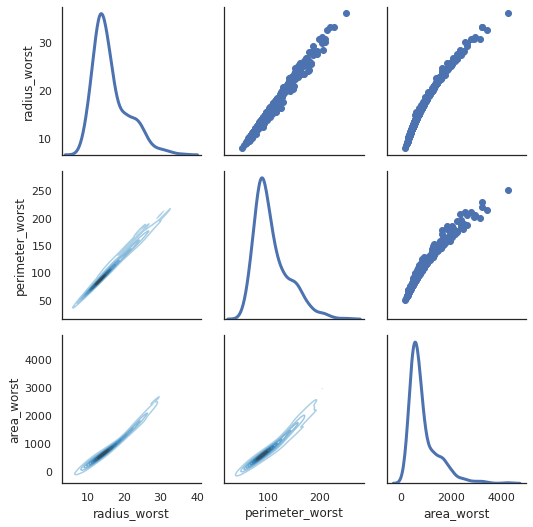

In [ ]:
sns.set(style="white")
df1 = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df1, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

##### SWARM PLOT

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

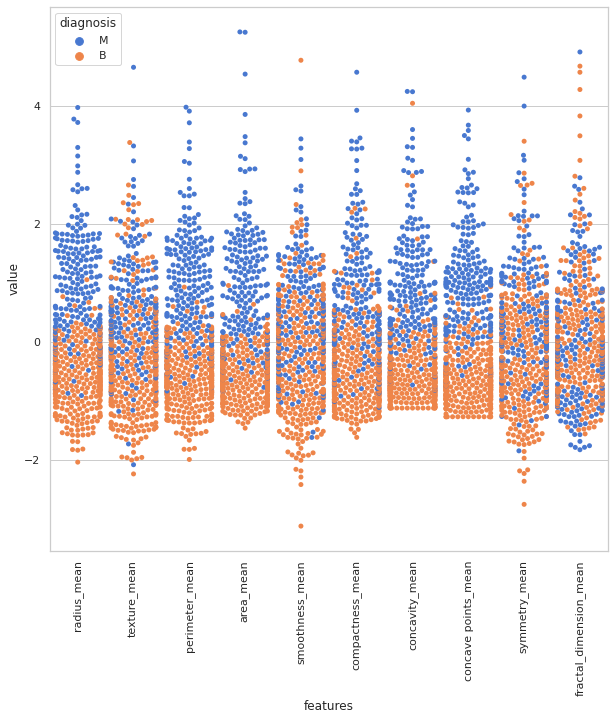

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

swarm plot time:  11.63629961013794  s


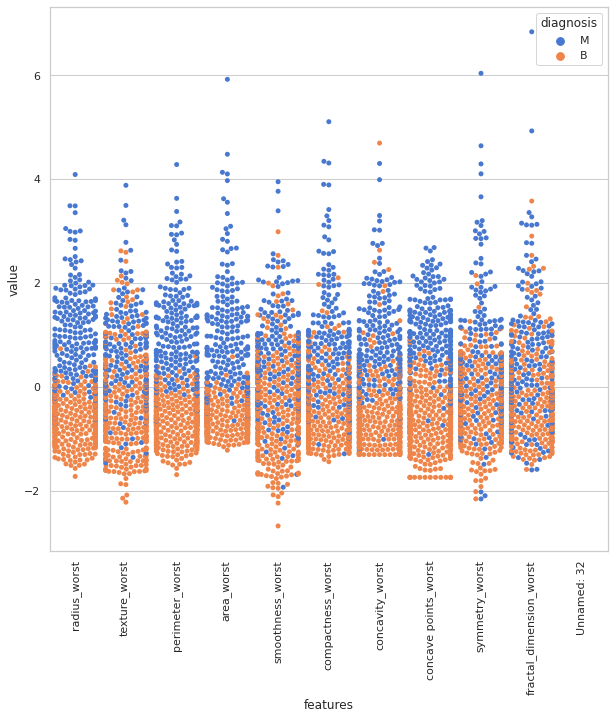

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")


##### They looks cool right. And you can see variance more clear. Let me ask you a question, in these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.


In [ ]:
#correlation map
#f,ax = plt.subplots(figsize=(18, 18))
#sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#####  id can be dropped or it can be converted as the index of the row

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df = df.drop(columns=["id"])

### 4. Feature Engineering
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. 
* DataSet / Feature Split 
* Feature Selection / Extraction
* Scaling : 
    * Normalization, or 
    * Standardization
    <details open>
    <summary>
        Normalization v/s Standardization
    </summary>
    <br>
        ![Alt text](./static/images/standard.svg)
        * z = (x - u) / s
        Standardize features by removing the mean and scaling to unit variance.
    https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
    </details>
* PCA : Principal component analysis

In [ ]:
label = "diagnosis"

#### 4.A Normalization
![foRMULA FOR MIN MAX](./static/images/minmax.png "Text to show on mouseover")

* all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.
* Why to normalize prior to model fitting?
* Variables that are measured at different scales do not contribute equally to the model fitting & model learned function  and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.
* Note: Tree-based models are usually not dependent on scaling, but non-tree models models such as SVM, LDA etc. are often hugely dependent on it.
* One important thing to keep in mind when using the MinMax Scaling is that it is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased.
* When the data is not normal distribution!
* norm : removing the magnitute, just the direction is left

<span style="color:red">Were there any outliers in our data ?</span>.

In [ ]:
def min_max_scale(column):
    if column.name == label:
        return column
    else:
        old_values = column.values.reshape(-1, 1)
        new_values = MinMaxScaler().fit_transform(old_values)
        new_values = new_values.reshape(-1)
        return new_values


In [ ]:
df = df.apply(min_max_scale)

df.shape

(569, 31)

In [ ]:
print(df[['diagnosis','area_mean','area_se','texture_mean','concavity_worst','concavity_mean']])

    diagnosis  area_mean   area_se  texture_mean  concavity_worst  \
0           M   0.363733  0.273811      0.022658         0.568610   
1           M   0.501591  0.125660      0.272574         0.192971   
2           M   0.449417  0.162922      0.390260         0.359744   
3           M   0.102906  0.038155      0.360839         0.548642   
4           M   0.489290  0.163688      0.156578         0.319489   
..        ...        ...       ...           ...              ...   
564         M   0.566490  0.283710      0.428813         0.328035   
565         M   0.474019  0.172279      0.626987         0.256789   
566         M   0.303118  0.077976      0.621238         0.271805   
567         M   0.475716  0.148335      0.663510         0.749760   
568         B   0.015907  0.023063      0.501522         0.000000   

     concavity_mean  
0          0.703140  
1          0.203608  
2          0.462512  
3          0.565604  
4          0.463918  
..              ...  
564        0.5714

#### A.B.1 Feature selection with correlation

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df = df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,M,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,M,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,M,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,M,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


#### Dataset split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df[label], random_state=42)

In [ ]:
df_train.shape

(398, 17)

In [ ]:
df_test.shape

(171, 17)

### 5. Features-Label split

In [ ]:
X_train = df_train.loc[:, df_train.columns != label]
y_train = df_train.loc[:, df_train.columns == label]

X_test = df_test.loc[:, df_test.columns != label]
y_test = df_test.loc[:, df_test.columns == label]
# https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/
# loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
X_train.shape

(398, 16)

In [ ]:
X_train.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
78,0.482246,0.467232,0.685836,0.879569,0.932323,0.662595,0.336987,0.204704,0.294626,0.275505,1.000000,0.175926,0.612362,0.613498,0.763848,0.292536
330,0.196145,0.275589,0.381692,0.282099,0.364646,0.206403,0.085617,0.049436,0.140259,0.093813,0.095514,0.076911,0.477646,0.395847,0.286615,0.237439
378,0.183970,0.185408,0.271283,0.099555,0.369697,0.189764,0.040112,0.008495,0.118945,0.061692,0.144903,0.137266,0.371987,0.205192,0.359156,0.271153
213,0.536016,0.341251,0.433059,0.394096,0.125253,0.183235,0.288808,0.096616,1.000000,0.363131,0.195137,0.403010,0.350855,0.223882,0.007491,0.086187
89,0.187014,0.215652,0.546809,0.233505,0.533333,0.284330,0.083319,0.067161,0.129007,0.112020,0.230596,0.136333,0.373308,0.207987,0.312636,0.194740


In [ ]:
#features = X_train.columns
#sm = SMOTE(random_state=random_state)#, ratio=1.0)
#X_train,y_train = sm.fit_resample(X_train,y_train)
#X_train = pd.DataFrame(X_train, columns=features)
#a = pd.DataFrame(y_train)
#a['diagnosis'].value_counts()

#### A.B.2 Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train)
select_feature.get_feature_names_out(X_train.columns)

Score list: [3.84538882e+00 2.03657696e+01 2.53775484e+00 3.06196825e+01
 1.97970437e+00 3.66545637e-03 1.73972635e-02 1.35240345e+01
 5.85621267e-02 1.31403514e+00 7.91760460e-05 4.95843510e-02
 4.63671197e+00 2.01574199e+01 4.17854903e+00 2.62786200e+00]
Feature list:      texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
78       0.482246   0.467232         0.685836        0.879569       0.932323   
330      0.196145   0.275589         0.381692        0.282099       0.364646   
378      0.183970   0.185408         0.271283        0.099555       0.369697   
213      0.536016   0.341251         0.433059        0.394096       0.125253   
89       0.187014   0.215652         0.546809        0.233505       0.533333   
..            ...        ...              ...             ...            ...   
37       0.294555   0.161315         0.335831        0.060028       0.205556   
415      0.387555   0.123139         0.407150        0.059864       0.484343   
458      

array(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'], dtype=object)

In [ ]:
X_train = select_feature.transform(X_train)
X_test = select_feature.transform(X_test)
#pd.DataFrame(X_train)
#.cv_results_).sort_values("rank_test_score")
#print('Feature list:', X_train.columns)

#### A.B.3 Feature Extraction with PCA

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(X_train)

### 6. Modelling


#### 1. SVC

##### Object

In [ ]:
svc_obj = SVC()

##### Params

In [ ]:
svc_params = {
    'kernel':('linear', 'rbf', 'sigmoid'),
    'C':[i for i in range(1, 11)]
}

##### Create a grid search object and train it on all combinations

In [ ]:
svc_gs_clf = GridSearchCV(svc_obj, svc_params)

svc_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ('linear', 'rbf', 'sigmoid')})

##### Get best parameters as per grid search

In [ ]:
svc_gs_clf.best_estimator_

SVC(C=8, kernel='linear')

##### Get the CV score on best parameters

In [ ]:
svc_gs_clf.best_score_

0.9446518987341772

##### Display all grid search results

In [ ]:
pd.DataFrame(svc_gs_clf.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.001618,0.000075,0.000604,0.000027,8,linear,"{'C': 8, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.936709,0.924051,0.944652,0.020559,1
18,0.001600,0.000045,0.000602,0.000019,7,linear,"{'C': 7, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.924051,0.942152,0.017202,2
15,0.001585,0.000102,0.000601,0.000016,6,linear,"{'C': 6, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.949367,0.911392,0.942152,0.020594,2
28,0.002300,0.000168,0.000752,0.000026,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.9625,0.9875,0.9125,0.911392,0.936709,0.942120,0.029413,4
27,0.001653,0.000097,0.000595,0.000027,10,linear,"{'C': 10, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.924051,0.924051,0.942120,0.022102,4
24,0.001689,0.000137,0.000601,0.000027,9,linear,"{'C': 9, 'kernel': 'linear'}",0.9625,0.9750,0.9250,0.924051,0.924051,0.942120,0.022102,4
6,0.001692,0.000050,0.000635,0.000029,3,linear,"{'C': 3, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
12,0.004928,0.005311,0.000760,0.000141,5,linear,"{'C': 5, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
9,0.001674,0.000115,0.000622,0.000025,4,linear,"{'C': 4, 'kernel': 'linear'}",0.9625,0.9625,0.9250,0.936709,0.911392,0.939620,0.020327,7
1,0.002304,0.000115,0.000940,0.000074,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9625,0.9625,0.9250,0.911392,0.936709,0.939620,0.020327,10


##### Calculate test scores on best parameters

In [ ]:
svc_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9532163742690059

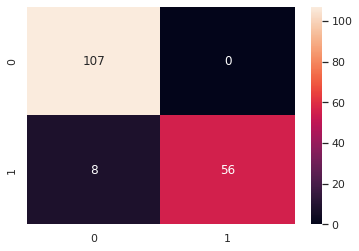

In [ ]:
cm_2 = confusion_matrix(y_test,svc_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

#### 2. Decision Tree

In [ ]:
dt_obj = DecisionTreeClassifier()

In [ ]:
dt_params = {
    "max_depth": [i for i in range(3, 11)],
    "min_samples_split": [i for i in range(2, 5)],
    "min_samples_leaf": [i for i in range(1, 5)]
}

In [ ]:
dt_gs_clf = GridSearchCV(dt_obj, dt_params)

dt_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
dt_gs_clf.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=3)

In [ ]:
dt_gs_clf.best_score_

0.959746835443038

In [ ]:
#pd.DataFrame(dt_gs_clf.cv_results_).sort_values("rank_test_score")

In [ ]:
dt_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9122807017543859

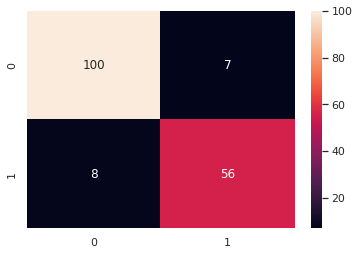

In [ ]:
cm_2 = confusion_matrix(y_test,dt_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

#### 3. Gaussian NB

In [ ]:
gnb_clf =  GaussianNB()

gnb_clf.fit(X_train, y_train.values.reshape(-1))

gnb_clf.score(X_test, y_test.values.reshape(-1))

0.935672514619883

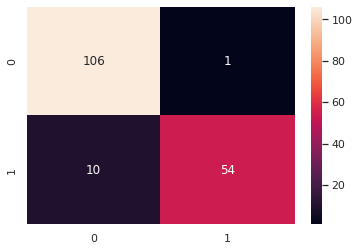

In [ ]:
cm_2 = confusion_matrix(y_test,gnb_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

 #### 4. RandomForest 

In [ ]:
#rf_clf = RandomForestClassifier(random_state=43 , )      

#rf_clf.fit(X_train,y_train.values.reshape(-1))

#rf_clf.score(X_test, y_test.values.reshape(-1))

In [ ]:
rf_obj = RandomForestClassifier()
rf_params = {
    'criterion':('gini', 'entropy'),
    'n_estimators':[i for i in range(100, 105)],
    'max_features' : ( 'auto', 'sqrt', 'log2')
}

In [ ]:
rf_gs_clf = GridSearchCV(rf_obj, rf_params)

rf_gs_clf.fit(X_train, y_train.values.reshape(-1))

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100, 101, 102, 103, 104]})

In [ ]:
svc_gs_clf.score(X_test, y_test.values.reshape(-1))

0.9532163742690059

Accuracy is:  0.9532163742690059


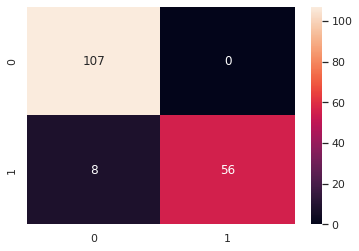

In [ ]:
ac = accuracy_score(y_test,svc_gs_clf.predict(X_test))
print('Accuracy is: ',ac)
cm_2 = confusion_matrix(y_test,svc_gs_clf.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

5. Linear Regression


In [ ]:
key = ['LogisticRegression']
value = [LogisticRegression()]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression()}

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.


In [ ]:
#outlier removal that will increase accurqacy
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=df["diagnosis"]
X=df.drop(["diagnosis"],axis=1)
columns= df.columns.tolist()
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]
#  1 = inlier
# -1 = outlier

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#So there are 3 columns that have outliers, lets plot them and check them out!
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

In [ ]:
X=df.drop(["diagnosis"],axis=1)
X= X.drop(outlier_index)
y= y.drop(outlier_index).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9766081871345029


In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.9473684210526315
2 0.9210526315789473
3 0.9298245614035088
4 0.9385964912280702
5 0.9649122807017544
6 0.9298245614035088
7 0.956140350877193
8 0.956140350877193
9 0.956140350877193
10 0.8771929824561403
11 0.956140350877193
12 0.9649122807017544
13 0.9473684210526315
14 0.9385964912280702
15 0.9210526315789473
16 0.9649122807017544
17 0.9385964912280702
18 0.8771929824561403
19 0.9210526315789473
20 0.9298245614035088
21 0.956140350877193
22 0.9824561403508771
23 0.9385964912280702
24 0.9649122807017544


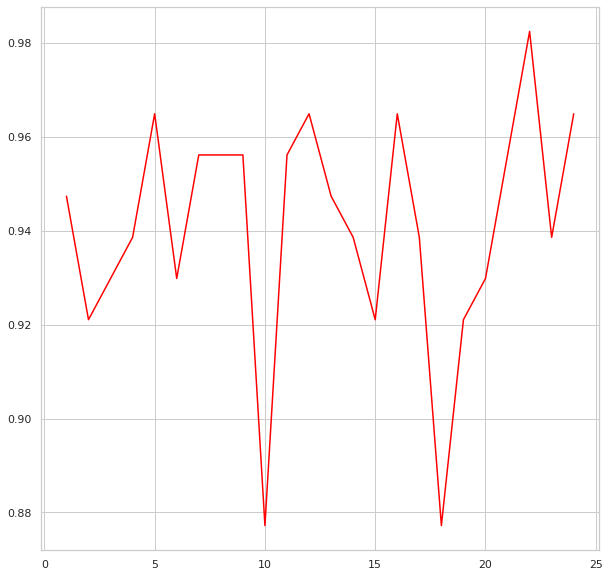

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [ ]:
for i in range(0,24):
    if acc[i] > 0.98:
        print(acc[i])

0.9824561403508771


In [ ]:
#precision_recall_fscore_support(y_test,svc_gs_clf.predict(X_test),average='macro')

ValueError: ignored

## 7. Prediction


In [ ]:

test = [181.0,19.15,24.54,0.4444,0.00000]
test = [0.015907,0.023063,0.501522,0.,0.00000]
prediction = svc_gs_clf.predict([np.array(test)])
prediction

In [ ]:
test = [1001.0,153.40,10.38,0.7119,0.30010]
test = [0.363733,0.273811,0.022658,0.568610,0.703140]
prediction = svc_gs_clf.predict([np.array(test)])
prediction

In [ ]:
new_best5 = df_original[['area_mean','area_se','texture_mean','concavity_worst','concavity_mean']]
min_max_model = MinMaxScaler().fit(new_best5)
new_vals = min_max_model.transform(new_best5)
test = [1001.0,153.40,10.38,0.7119,0.30010]
test = np.array(test).reshape(1, -1)
test = min_max_model.transform(test)
print(test)
prediction = svc_gs_clf.predict(test)
prediction

In [ ]:
test = [181.0,19.15,24.54,0.4444,0.00000]
test = np.array(test).reshape(1, -1)
test = min_max_model.transform(test)
print(test)
prediction = svc_gs_clf.predict(test)
prediction